## **Joke Rating Prediction with Surprise**

In [ ]:
import os 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from surprise import SVD, Reader, Dataset
from surprise.model_selection.validation import cross_validate
from surprise.model_selection import GridSearchCV, train_test_split

**Data**

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
jokes = pd.read_csv('jokes.csv')
ss = pd.read_csv('sample_submission.csv')

In [ ]:
train

,id,user_id,joke_id,Rating
0,31030_110,31030,110,2.750
1,16144_109,16144,109,5.094
2,23098_6,23098,6,-6.438
3,14273_86,14273,86,4.406
4,18419_134,18419,134,9.375
...,...,...,...,...
1092054,9517_132,9517,132,3.156
1092055,27767_118,27767,118,-1.594
1092056,10580_81,10580,81,2.000
1092057,31007_119,31007,119,8.906


In [ ]:
jokes.head()

,joke_id,joke_text
0,1,Q. What's O. J. Simpson's web address? A. Slas...
1,2,How many feminists does it take to screw in a ...
2,3,Q. Did you hear about the dyslexic devil worsh...
3,4,They asked the Japanese visitor if they have e...
4,5,Q: What did the blind person say when given so...


In [ ]:
# Size of the data 
train.shape, test.shape

((1092059, 4), (537880, 3))

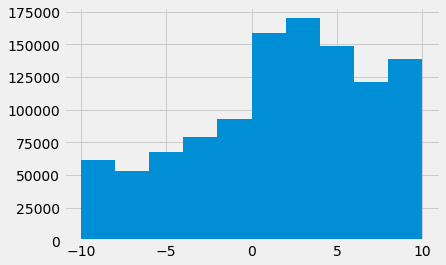

In [ ]:
train['Rating'].hist();

**Loading Data**

In [ ]:
reader = Reader(rating_scale=(-10, 10))
data = Dataset.load_from_df(train.iloc[:,1:4], reader)
train_set, val_set = train_test_split(data, test_size=0.15)

**Parameter Optimization with GridSearchCV**

In [ ]:
# pg_SVD = {'n_factors': [50, 100, 150],
#           'n_epochs': [10, 20, 30, 40, 50], 
#           'lr_all': [0.005, 0.001, 0.01, 0.1], 
#           'reg_all': [0.1, 0.2, 0.04, 0.06]}

# gs_SVD = GridSearchCV(SVD, pg_SVD, measures=['rmse'], cv=3)
# gs_SVD.fit(data)

In [ ]:
# print(gs_SVD.best_score['rmse'])
# print(gs_SVD.best_params['rmse'])

In [ ]:
# hyp_params = gs_SVD.best_params['rmse']

In [ ]:
svd = SVD(n_epochs = 30, 
          lr_all = 0.001,
          reg_all = 0.1, random_state=6)

svd.fit(train_set)

In [ ]:
predictions = svd.test(val_set)

In [ ]:
from surprise import accuracy
accuracy.rmse(predictions)

RMSE: 4.0293


4.02927295252266

In [ ]:
test_prediction = [(test.iloc[i,0],test.iloc[i,1],test.iloc[i,2],
                    svd.predict(test.iloc[i,1],test.iloc[i,2]).est) for i in range(test.shape[0]) ]

In [ ]:
preds_df = pd.DataFrame(test_prediction,columns=['id','user_id','joke_id','Rating'])

In [ ]:
ss['Rating'] = preds_df['Rating']

In [ ]:
ss

,id,Rating
0,6194_11,2.812619
1,19356_3,-0.345342
2,23426_79,5.428989
3,40030_3,-6.007027
4,19806_115,7.462484
...,...,...
537875,14333_74,-5.830844
537876,25245_16,7.529488
537877,4082_9,-0.788564
537878,19638_128,6.344409


In [ ]:
ss.to_csv("submission.csv",index=False,header=ss.columns)

In [ ]:
# Download
from google.colab import files        
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>